In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('bmh')

In [2]:
# Read in our data
fake_data = pd.read_csv('fake_data.csv')

In [3]:
# drop the unnecessary column
fake_data = fake_data.drop('Unnamed: 0',axis=1)

In [4]:
# Preview our data
fake_data.head()

,individual_id,dates,default
0,1,2013-01-01,0
1,1,2013-02-01,0
2,1,2013-03-01,0
3,1,2013-04-01,0
4,1,2013-05-01,0


We use some pandas builtin funtions to group our data using the month and default status.
This step comes in handy later in providing a faster way of processing our data.

In [5]:
df = fake_data.groupby(['dates','default']);

# Part 1

We create a list of the loan ids.

In [6]:
ids = fake_data.individual_id.unique().tolist()

We loop over the pandas dataframe and if the loan has defaulted i.e. the default column contains a 1,
we remove that loan's id from our list of loan ids.

In [7]:
for n in range(len(fake_data)):
    if (fake_data.iloc[n]['default'] == 1):
        ids.remove(fake_data.iloc[n]['individual_id'])

Finally we print out the length of our list of remaining loan ids

In [8]:
print(len(ids))

463


Alternatively, we can use some faster pandas builtin functions instead of the loop that allow us to find out the number of loans that are still active (default column has 0) on a specified month.

In [9]:
df.get_group(('2017-11-01',0)).individual_id.count()

463

We test our list to see if there are any loans still in our list that we know have defaulted as of November 2017

In [10]:
if (100 in ids):
    print ('found')
else:
    print ('not found')

not found


# Part 2

#### We create a new dataframe of our grouped data.
#### The new dataframe consists of the counts for active loans for each month.
For example for '2013-01-01' we have:
<ul>
<li>Active loans: 976</li>
<li>Defaulted loans: 24</li>
</ul>

In [11]:
df2 = df.count().reset_index()
df2 = df2[df2['default'] == 0]
# Preview the new dataframe
df2.head()

,dates,default,individual_id
0,2013-01-01,0,976
2,2013-02-01,0,961
4,2013-03-01,0,959
6,2013-04-01,0,920
8,2013-05-01,0,894


We then find the count for the month with the lowest number active loans and the count for the month with 
the highest number of active loans.

In [12]:
lower = df2.individual_id.quantile(q=0.05,interpolation='lower')
upper = df2.individual_id.quantile(q=0.95,interpolation='lower')
# Alternatively we could loop through the data and find the lower and upper bounds
# for n in range(len(df2)):
#     if (df2.iloc[n].individual_id < lower):
#         lower = df2.iloc[n].individual_id
#     elif (df2.iloc[n].individual_id > upper):
#         upper = df2.iloc[n].individual_id
    
print(' Lower bound:',lower,'\n','Upper bound:',upper)

 Lower bound: 471 
 Upper bound: 920


# Part 3

### Using with the lower 5% case
<ul>
<li>If we assume that each loan is for $100</li>
<li>And the period is for two years</li>
<li>With a compound rate of 12% annually</li>
</ul>

In [13]:
pv = (lower * 100) * ((1+0.12)**-2)
dpv = (lower * 100 / ((1 + 0.12)**2))
       
print(' Present value of loans in the the lower 5% case:',pv,'\n','Discounted present value of loans in the the lower 5% case:',dpv)

 Present value of loans in the the lower 5% case: 37547.831632653055 
 Discounted present value of loans in the the lower 5% case: 37547.831632653055


<br />
<br />

<hr style="height:2px" />

### Some Visualizations

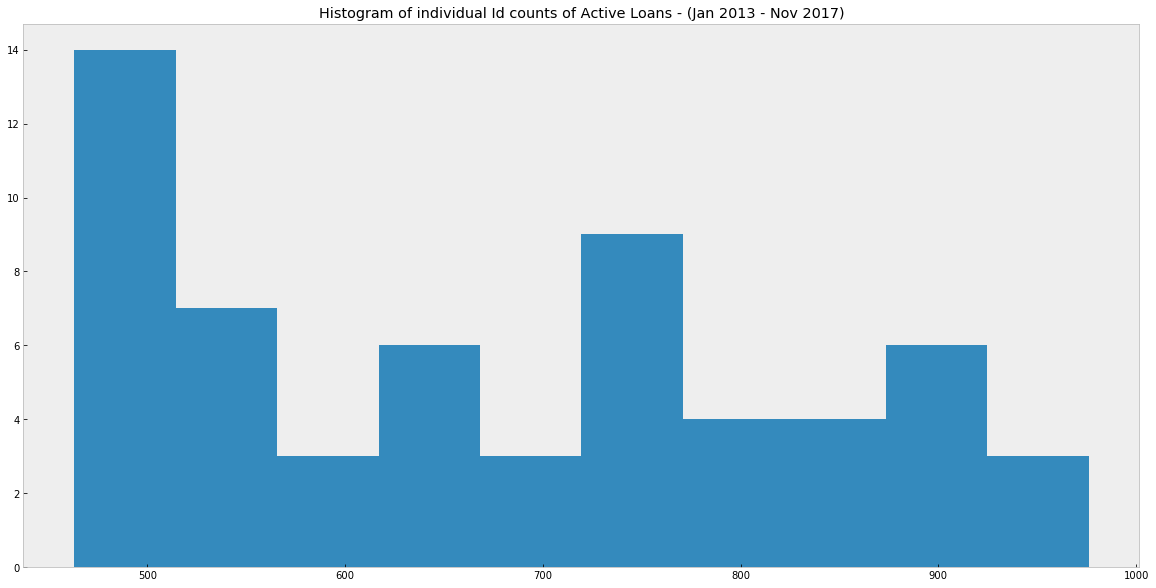

In [14]:
df2.individual_id.hist(grid=False,figsize=(20,10))
plt.title('Histogram of individual Id counts of Active Loans - (Jan 2013 - Nov 2017)');

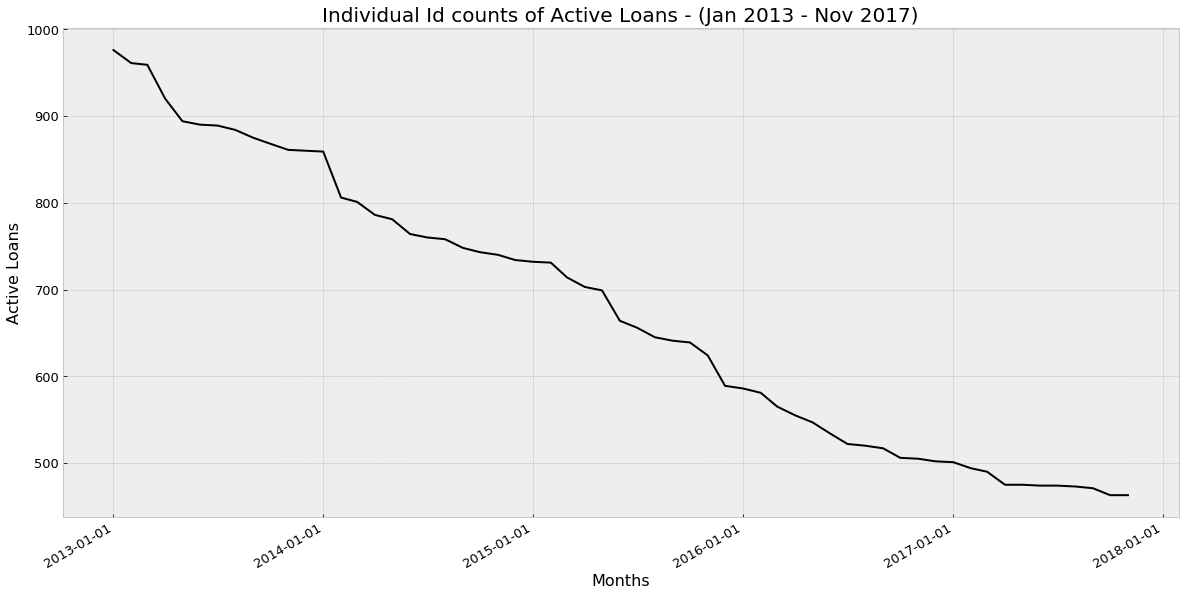

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot_date(df2['dates'], df2['individual_id'], fmt='-', color='k')
fig.autofmt_xdate()
xfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.title('Individual Id counts of Active Loans - (Jan 2013 - Nov 2017)', fontsize=20)
plt.xlabel('Months', fontsize=16)
plt.ylabel('Active Loans', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

<br />
<br />

<hr style="height:2px" />

# Some Time Series Analysis for our Active Loans

In [16]:
df3 = df2.copy()
df3 = df3.set_index(pd.DatetimeIndex(df3['dates']))
df3 = df3.drop(['dates','default'],axis=1)
df3.head()

,individual_id
dates,
2013-01-01,976
2013-02-01,961
2013-03-01,959
2013-04-01,920
2013-05-01,894


In [17]:
df3.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
      

In [18]:
ts = pd.to_numeric(df3['individual_id']).astype(float)

## Some stationarity testing

In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(20,10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


/home/patrick/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


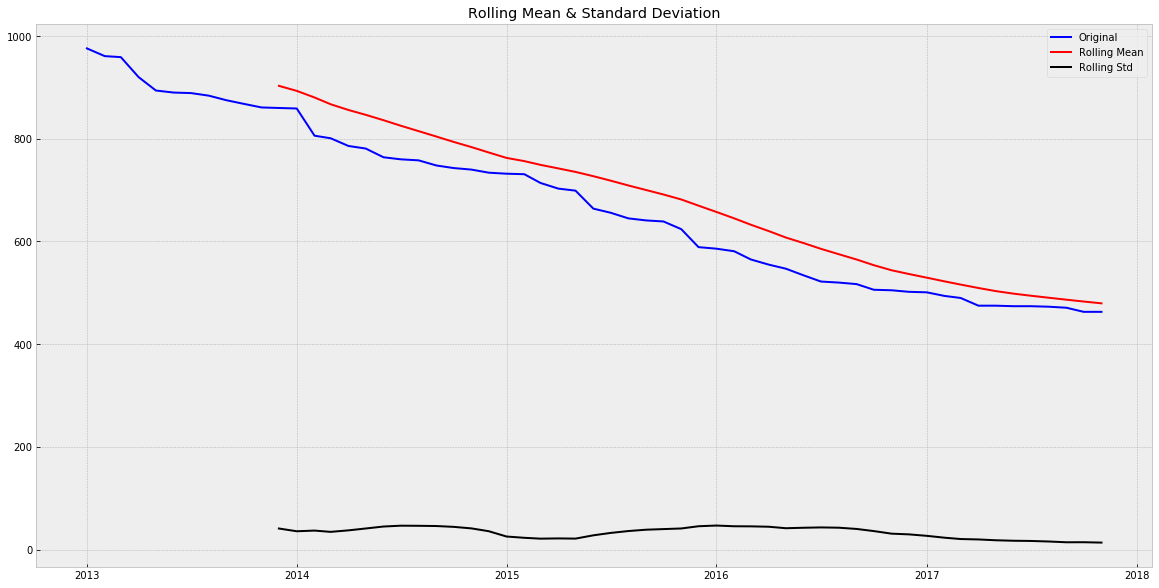

Results of Dickey-Fuller Test:
Test Statistic                 -2.161452
p-value                         0.220532
#Lags Used                      0.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


In [20]:
test_stationarity(ts)

<br />
<br />

### Autocorrelation testing

In [21]:
def pandas_autocorrelation(timeseries):
    plt.figure(figsize=(20,10))
    from pandas.plotting import autocorrelation_plot
    autocorrelation_plot(timeseries)
    plt.show()

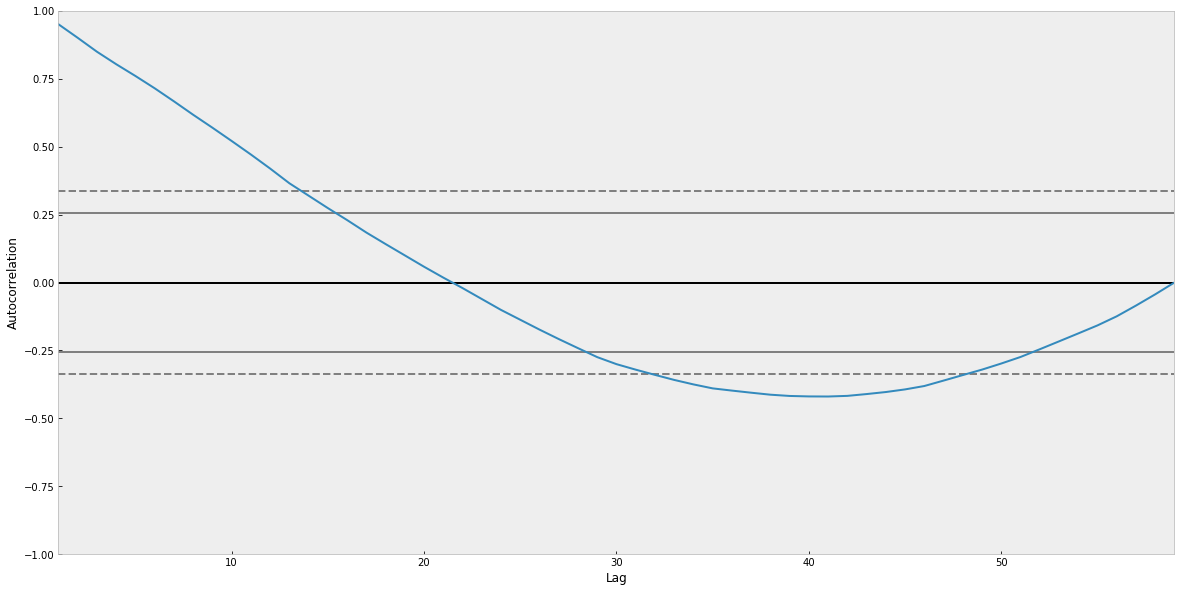

In [22]:
pandas_autocorrelation(ts)

In [23]:
def lag_plot(timeseries):
    plt.figure(figsize=(20,10))
    from pandas.plotting import lag_plot
    lag_plot(timeseries)
    plt.show()

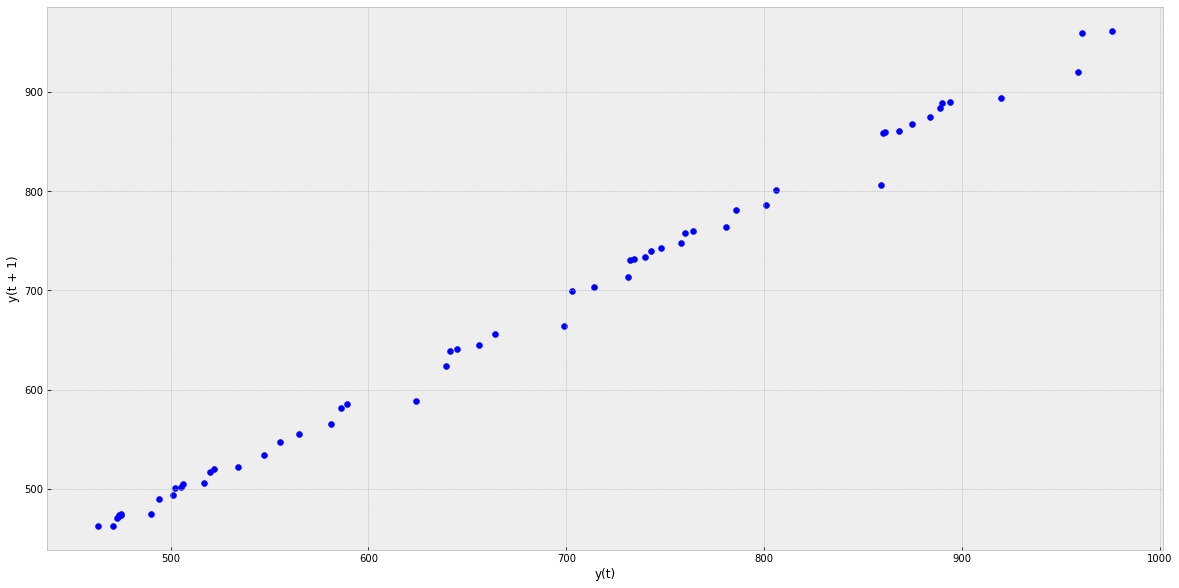

In [24]:
lag_plot(ts)

In [25]:
def sm_autocorrelation(timeseries):
    plt.figure(figsize=(20,10))
    from statsmodels.graphics.tsaplots import plot_acf
    plot_acf(ts, lags=40)
    plt.show()

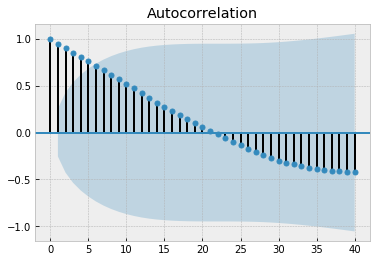

In [26]:
sm_autocorrelation(ts)

<br />
<br />

### ARIMA

In [27]:
def arima_fit(timeseries,o):
    from statsmodels.tsa.arima_model import ARIMA
    # fit model
    model_arima = ARIMA(ts, order=(o,1,0))
    model_arima_fit = model_arima.fit(disp=1)
    print(model_arima_fit.summary())
    return model_arima_fit

def arima_plots(model_fit):
    plt.figure(figsize=(20,10))
    # plot residual errors
    residuals = pd.DataFrame(model_fit.resid)
    residuals.plot()
    plt.show()
    residuals.plot(kind='kde')
    plt.show()
    print(residuals.describe())

In [28]:
mf = arima_fit(ts,15)

                             ARIMA Model Results                              
Dep. Variable:        D.individual_id   No. Observations:                   58
Model:                ARIMA(15, 1, 0)   Log Likelihood                -213.367
Method:                       css-mle   S.D. of innovations              9.396
Date:                Wed, 10 Jan 2018   AIC                            460.734
Time:                        21:53:58   BIC                            495.761
Sample:                    02-01-2013   HQIC                           474.378
                         - 11-01-2017                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -8.8460      1.296     -6.824      0.000     -11.387      -6.305
ar.L1.D.individual_id      0.0284      0.126      0.225      0.823      -0.219       0.275
ar.L

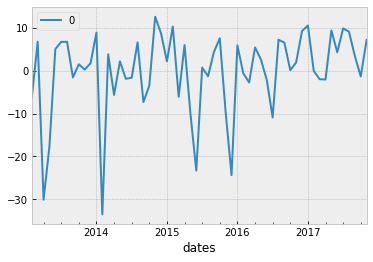

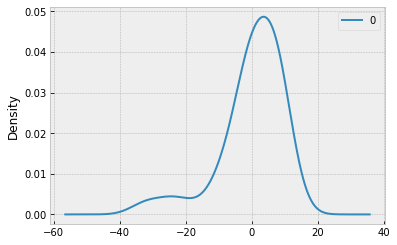

               0
count  58.000000
mean   -0.172195
std     9.796629
min   -33.504616
25%    -2.129379
50%     1.834081
75%     6.700544
max    12.581040


In [29]:
arima_plots(mf)

<br />
<br />

### Persistence Testing

Test MSE: 22.667


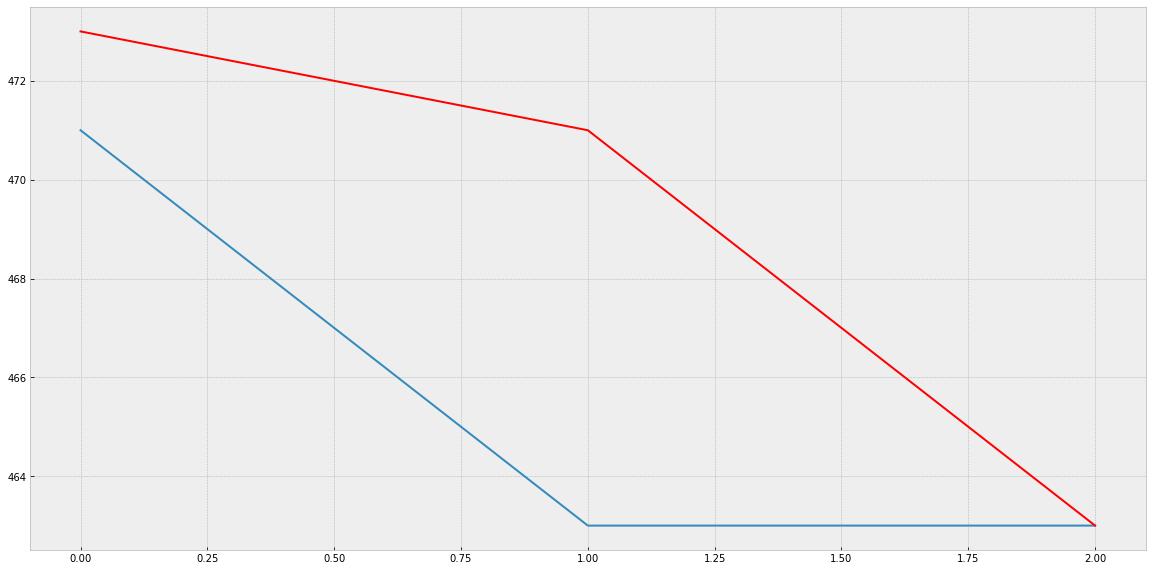

In [30]:
plt.figure(figsize=(20,10))
from sklearn.metrics import mean_squared_error
# create lagged dataset
values = pd.DataFrame(ts.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-3], X[len(X)-3:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
    return x
 
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

<br />
<br />

### Predicting the last quarter

Lag: 10
Coefficients: [ 4.23538862  0.83886226  0.08160448  0.04659847  0.0603631  -0.0854562
  0.09618336 -0.15926715 -0.10868909  0.26543471 -0.06088779]
predicted=466.364745, expected=471.000000
predicted=460.529083, expected=463.000000
predicted=456.157766, expected=463.000000
Test MSE: 24.802


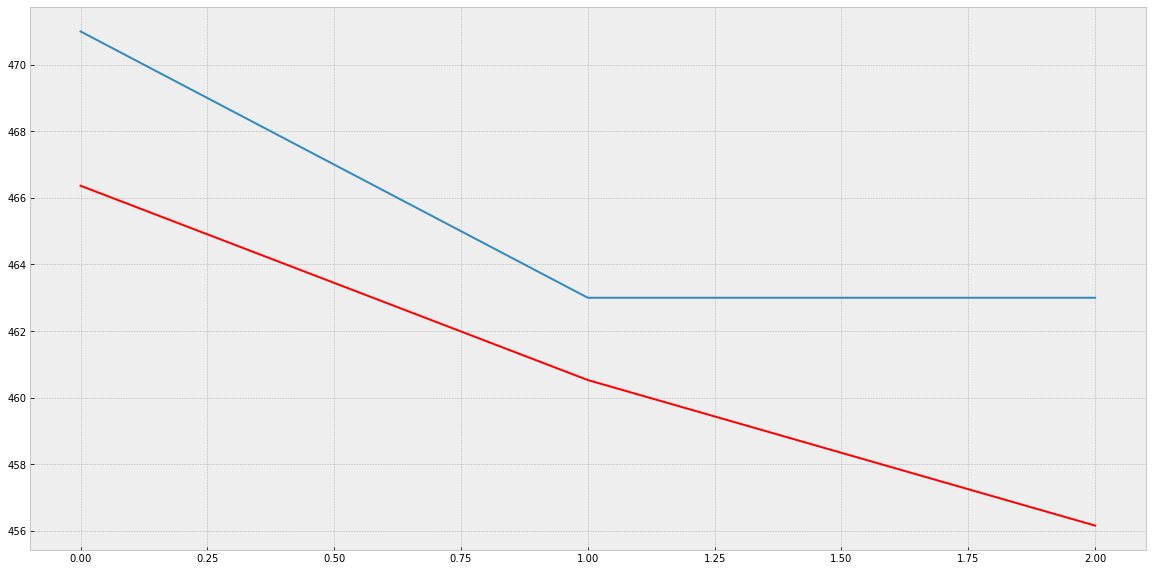

In [31]:
plt.figure(figsize=(20,10))
from statsmodels.tsa.ar_model import AR
# split dataset
X = ts.values
train, test = X[1:len(X)-3], X[len(X)-3:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

<br />
<br />
<br />

<hr style="height:2px" />

## Lets create a loanbook Class from which we can run all of the above using a python script

In [33]:
class loanbook:
           
    def __init__(self, url):
        super(loanbook, self).__init__()
        
        self.pd = __import__('pandas')
        self.mat = __import__('matplotlib')
        self.ss = __import__('statsmodels.api')
        %matplotlib inline
        self.mat.pyplot.style.use('bmh')
        
        self.df = self.pd.read_csv(url)
        if "Unnamed: 0" in self.df.columns:
            self.df = self.df.drop('Unnamed: 0',axis=1)
        self.df2 = self.df.groupby(['dates','default'])
        self.df3 = self.df2.count().reset_index()
        self.df4 = self.df3[self.df3['default'] == 0]
        
        self.df5 = self.df4.copy()
        self.df5 = self.df5.set_index(self.pd.DatetimeIndex(self.df5['dates']))
        self.df5 = self.df5.drop(['dates','default'],axis=1)
        self.ts = self.pd.to_numeric(self.df5['individual_id']).astype(float)
    
    def show_sample(self,dataframe):
        if dataframe is 'df':
            return self.df.head()
        elif dataframe is 'df2':
            return self.df2.head()
    
    def active_loans_brute(self,p):
        ids = self.df.individual_id.unique().tolist()
    
        for n in range(len(self.df)):
            if (self.df.iloc[n]['default'] == 1):
                ids.remove(self.df.iloc[n]['individual_id'])
        if p is 'y':
            print (len(ids))
        return ids
    
    def active_check(self,loanid):
        if len(ids) == len(self.df):
            print("Please run the active_loans_brute functtion before running this function.")
        else:
            if (loanid in ids):
                print ('found')
            else:
                print ('not found')
    
    def active_loans_pandas(self,date):
        return self.df2.get_group((date,0)).individual_id.count()

    def active_upper_lower(self):
        
        df_u_l = self.df3[self.df3['default'] == 0]
        
        lower = df2.individual_id.quantile(q=0.05,interpolation='lower')
        upper = df2.individual_id.quantile(q=0.95,interpolation='lower')
    
        print(' Lower bound:',lower,'\n','Upper bound:',upper)
    
    def active_upper(self):
        return self.df4.individual_id.quantile(q=0.95,interpolation='lower')
    
    def active_lower(self):
        return self.df4.individual_id.quantile(q=0.05,interpolation='lower')
    
    def active_pv(self,l, value = 100, rate = 0.12, length = 2):
        if l is 'u':
            pv = (self.active_upper() * value) * ((1 + rate) ** -length)
            dpv = (self.active_upper() * value / ((1 + rate)** length))
            print(' Present value of loans in the the lower 5% case:',pv,'\n','Discounted present value of loans in the the lower 5% case:',dpv)
        elif l is 'l':
            pv = (self.active_lower() * value) * ((1 + rate) ** -length)
            dpv = (self.active_lower() * value / ((1 + rate)** length))
            print(' Present value of loans in the the lower 5% case:',pv,'\n','Discounted present value of loans in the the lower 5% case:',dpv)
        else:
            print ("Please use either l or u for lower or upper bounds of active loans.")
        
    def plot_hist(self):
        self.df4.individual_id.hist(grid=False,figsize=(20,10))
        self.mat.pyplot.title('Histogram of individual Id counts of Active Loans - (Jan 2013 - Nov 2017)');
    
    def plot_activeloans(self):
        fig, ax = self.mat.pyplot.subplots(figsize=(20, 12))
        ax.plot_date(self.df4['dates'], self.df4['individual_id'], fmt='-', color='k')
        fig.autofmt_xdate()
        xfmt = self.mat.dates.DateFormatter('%Y-%m-%d')
        ax.xaxis.set_major_formatter(xfmt)
        self.mat.pyplot.title('Individual Id counts of Active Loans - (Jan 2013 - Nov 2017)', fontsize=20)
        self.mat.pyplot.xlabel('Months', fontsize=16)
        self.mat.pyplot.ylabel('Active Loans', fontsize=16)
        self.mat.pyplot.xticks(fontsize=13)
        self.mat.pyplot.yticks(fontsize=13);
    
    def pandas_autocorrelation(self):
        self.mat.pyplot.figure(figsize=(20,10))
        self.pd.plotting.autocorrelation_plot(self.ts)
        self.mat.pyplot.show()    
    
    def lag_plot(self):
        self.mat.pyplot.figure(figsize=(20,10))
        self.pd.plotting.lag_plot(self.ts)
        self.mat.pyplot.show()
        
    def sm_autocorrelation(self):
        self.mat.pyplot.figure(figsize=(20,10))
        self.ss.graphics.tsaplots.plot_acf(self.ts, lags=40)
        self.mat.pyplot.show()
    
    def test_stationarity(self):
        #Determing rolling statistics
        rolmean = self.ts.rolling(window=12,center=False).mean()
        rolstd = self.ts.rolling(window=12,center=False).std()

        #Plot rolling statistics:
        self.mat.pyplot.figure(figsize=(20,10))
        orig = self.mat.pyplot.plot(self.ts, color='blue',label='Original')
        mean = self.mat.pyplot.plot(rolmean, color='red', label='Rolling Mean')
        std = self.mat.pyplot.plot(rolstd, color='black', label = 'Rolling Std')
        self.mat.pyplot.legend(loc='best')
        self.mat.pyplot.title('Rolling Mean & Standard Deviation')
        self.mat.pyplot.show(block=False)

        #Perform Dickey-Fuller test:
        print ('Results of Dickey-Fuller Test:')
        dftest = self.ss.tsa.stattools.adfuller(self.ts, autolag='AIC')
        dfoutput = self.pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print (dfoutput)
    
    def arima_fit(self,o,p='n'):
        # fit model
        model_arima = self.ss.tsa.arima_model.ARIMA(self.ts, order=(o,1,0))
        model_arima_fit = model_arima.fit(disp=1)
        if p is 'y':
            print(model_arima_fit.summary())
        return model_arima_fit

    def arima_plots(self,o):
        # plot residual errors
        model_fit = self.arima_fit(o)
        residuals = self.pd.DataFrame(model_fit.resid)
        
        self.mat.pyplot.figure(figsize=(20,10))
        #self.mat.pyplot.subplot(121)
        #self.mat.pyplot.plot(residuals)
        residuals.plot
        
        #self.mat.pyplot.subplot(122)
        #self.mat.pyplot.plot(kind='kde')
        residuals.plot.kde()
        #self.mat.pyplot.show()
        print(residuals.describe())
        
    def persitence_testing(self,duration):
        self.mat.pyplot.figure(figsize=(20,10))
        from sklearn.metrics import mean_squared_error
        # create lagged dataset
        values = self.pd.DataFrame(self.ts.values)
        dataframe = self.pd.concat([values.shift(1), values], axis=1)
        dataframe.columns = ['t-1', 't+1']
        # split into train and test sets
        X = dataframe.values
        train, test = X[1:len(X)-duration], X[len(X)-duration:]
        train_X, train_y = train[:,0], train[:,1]
        test_X, test_y = test[:,0], test[:,1]

        # persistence model
        def model_persistence(x):
            return x

        # walk-forward validation
        predictions = list()
        for x in test_X:
            yhat = model_persistence(x)
            predictions.append(yhat)
        test_score = mean_squared_error(test_y, predictions)
        print('\nTest MSE: %.4f' % test_score)
        # plot predictions vs expected
        self.mat.pyplot.plot(test_y)
        self.mat.pyplot.plot(predictions, color='red')
        self.mat.pyplot.show()

In [34]:
my_loanbook = loanbook("fake_data.csv")


Test MSE: 11.6667


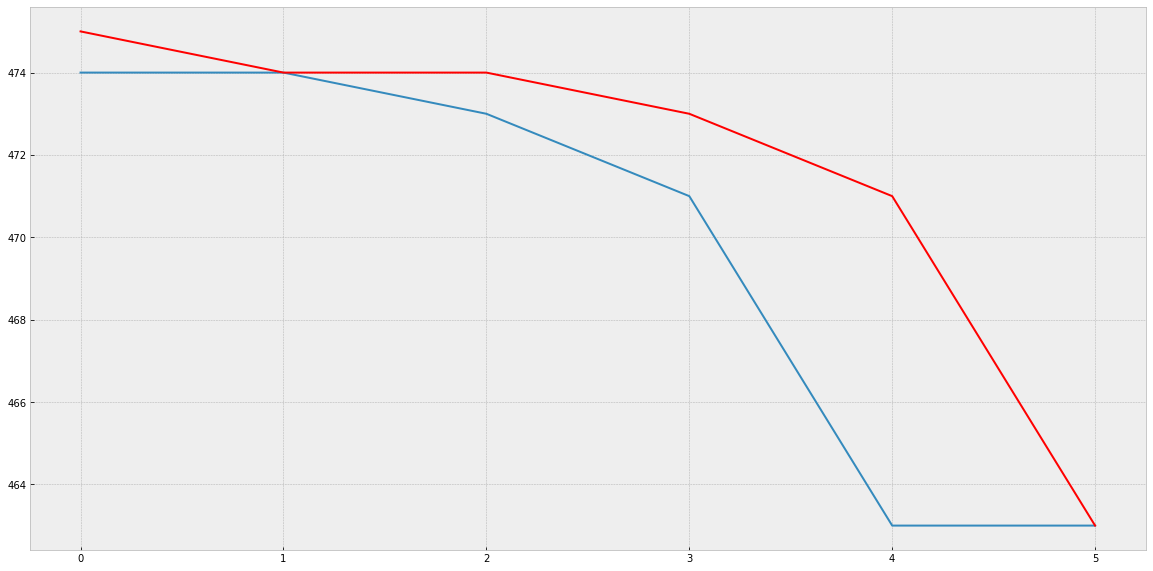

In [35]:
my_loanbook.persitence_testing(6)